# Targeter

## Given:
Earth-Moon system and position and velocity.
$$\vec{r} = 0.488 \hat{x} + 0.2 \hat{y}$$
$$\vec{v} = -0.88\hat{x} + 0.2\hat{y}$$

## Find:
a) Numerically integrate trajectory for first time. What is the tme interval? Now target these posiions:

i) $x_f = 0.3$ $y_f = 0.05$

ii) $x_f = -0.1$ $y_f = 0$

iii) $x_f = -0.4$ $y_f = -0.1$

For each of the $\delta v$ fix the time. Plot the results including each guesses. What are the resulting $\Delta \vec{v}$ and $|\Delta \vec{v}|$ in non-dimensional. Moreover what are the $t$, $r$, and $\Delta v$  in dimensional.

b) Complete sane 3 cases but now $\delta \dot{x}_f = 0$ and $\delta t_f \neq 0$.

c) How far away can the can te solution still converge? Pick far away points. How many iterations does it take>

Do the iterations move smoothly? Is it random while prior to reach a solution?

In [47]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from datetime import timedelta

In [48]:
r_vec = np.array([0.488, 0.2, 0])
v_vec = np.array([-0.88, 0.2, 0])

system = "Earth-Moon"

### Part a)

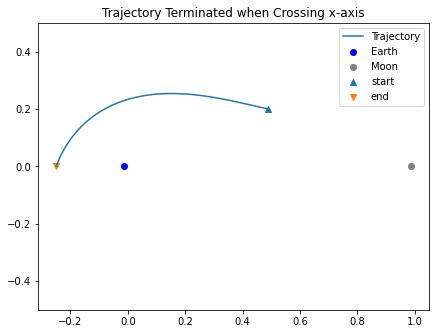

In [49]:
IC = np.append(r_vec, v_vec)
IC = np.append(IC,  np.eye(6).reshape((36,)))
t_span = [0, 1]

def event(t,x):
    return x[1]

event.direction = 0
event.terminal = True

traj = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45', 
                 rtol=10**-12, atol=10**-16, events=event)


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.plot(traj.y[0,:], traj.y[1,:], label='Trajectory')
axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.scatter(traj.y[0,0], traj.y[1,0], marker='^', label="start")
axs.scatter(traj.y[0,-1], traj.y[1,-1], marker='v', label="end")
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')
axs.set_title('Trajectory Terminated when Crossing x-axis')
axs.legend()

*****  Non-Dimensional  *****
The delta V required is:  [-0.1685   0.03928  0.     ]
The delta V required is:  0.17302
Final position is:  [-0.3   0.05  0.  ]

 *****  Dimensional  *****
The delta V required is (km/s):  [-0.17264  0.04025  0.     ]
The delta V required is (km/s):  0.17727
Final position is (km): [-115320.   19220.       0.]
The time taken:  2 days, 1:42:45.753377


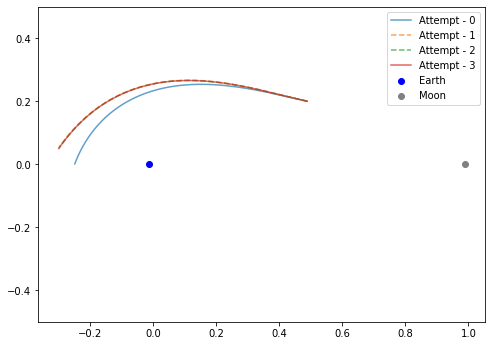

In [50]:
target = {'x_f': -0.3, 'y_f':0.05}
changeable = ('x_dot_0', 'y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_1, final_1, tf_1 = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, 
                                plot=True, attempts=10, axs=axs)

delV_vec = IC_1[3:6] - traj.y[3:6, 0]
delV_vec_dim = delV_vec*SS3.loc[system, 'l*']/SS3.loc[system, 't*']

final_dim = pn.L_2_dim(final_1[:3], SS3.loc[system, 'l*'])

print('*'*5, ' Non-Dimensional ', '*'*5)
print('The delta V required is: ', np.round(delV_vec,5))
print('The delta V required is: ', round(np.linalg.norm(delV_vec),5))
print('Final position is: ', np.round(final_1[:3],5))


print('\n','*'*5, ' Dimensional ', '*'*5)
print('The delta V required is (km/s): ', np.round(delV_vec_dim,5))
print('The delta V required is (km/s): ', round(np.linalg.norm(delV_vec_dim),5))
print('Final position is (km):', np.round(final_dim))
print('The time taken: ', timedelta(seconds = pn.t_2_dim(tf_1, SS3.loc[system, 't*'])))


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')


*****  Non-Dimensional  *****
The delta V required is:  [ 0.59804 -0.11735  0.     ]
The delta V required is:  0.60944
Final position is:  [-0.1  0.   0. ]

 *****  Dimensional  *****
The delta V required is (km/s):  [ 0.61272 -0.12023  0.     ]
The delta V required is (km/s):  0.6244
Final position is (km): [-115320.   19220.       0.]
The time taken:  2 days, 1:42:45.753377


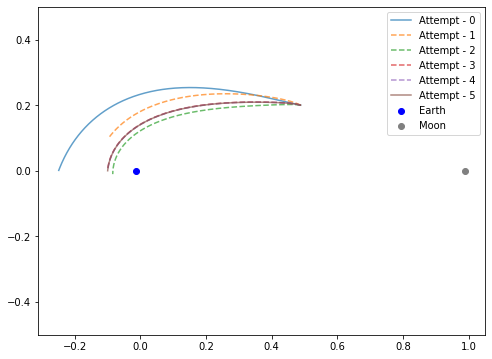

In [51]:
target = {'x_f': -0.1, 'y_f':0}
changeable = ('x_dot_0', 'y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_2, final_2, tf_2 = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, tol=10**-6, 
                                change_tf = False, plot=True, attempts=10, axs=axs)


delV_vec = IC_2[3:6] - traj.y[3:6, 0]
delV_vec_dim = delV_vec*SS3.loc[system, 'l*']/SS3.loc[system, 't*']

final_dim = pn.L_2_dim(final_1[:3], SS3.loc[system, 'l*'])

print('*'*5, ' Non-Dimensional ', '*'*5)
print('The delta V required is: ', np.round(delV_vec,5))
print('The delta V required is: ', round(np.linalg.norm(delV_vec),5))
print('Final position is: ', np.round(final_2[:3],5))


print('\n','*'*5, ' Dimensional ', '*'*5)
print('The delta V required is (km/s): ', np.round(delV_vec_dim,5))
print('The delta V required is (km/s): ', round(np.linalg.norm(delV_vec_dim),5))
print('Final position is (km):', np.round(final_dim))
print('The time taken: ', timedelta(seconds = pn.t_2_dim(tf_2, SS3.loc[system, 't*'])))



axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')

*****  Non-Dimensional  *****
The delta V required is:  [-0.54625 -0.10382  0.     ]
The delta V required is:  0.55602
Final position is:  [-0.4 -0.1  0. ]

 *****  Dimensional  *****
The delta V required is (km/s):  [-0.55966 -0.10637  0.     ]
The delta V required is (km/s):  0.56967
Final position is (km): [-153760.  -38440.       0.]
The time taken:  2 days, 1:42:45.753377


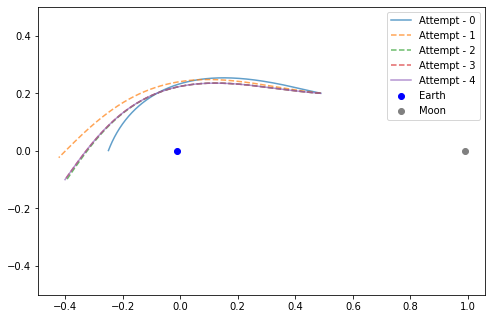

In [52]:
target = {'x_f': -0.4, 'y_f':-0.1}
changeable = ('x_dot_0', 'y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_3, final_3, tf_3 = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, tol=10**-6, 
                                change_tf = False, plot=True, attempts=10, axs=axs)


delV_vec = IC_3[3:6] - traj.y[3:6, 0]
delV_vec_dim = delV_vec*SS3.loc[system, 'l*']/SS3.loc[system, 't*']

final_dim = pn.L_2_dim(final_3[:3], SS3.loc[system, 'l*'])

print('*'*5, ' Non-Dimensional ', '*'*5)
print('The delta V required is: ', np.round(delV_vec,5))
print('The delta V required is: ', round(np.linalg.norm(delV_vec),5))
print('Final position is: ', np.round(final_3[:3],5))


print('\n','*'*5, ' Dimensional ', '*'*5)
print('The delta V required is (km/s): ', np.round(delV_vec_dim,5))
print('The delta V required is (km/s): ', round(np.linalg.norm(delV_vec_dim),5))
print('Final position is (km):', np.round(final_dim))
print('The time taken: ', timedelta(seconds = pn.t_2_dim(tf_3, SS3.loc[system, 't*'])))


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')

### Part b)

*****  Non-Dimensional  *****
The delta V required is:  [0.      0.09811 0.     ]
The delta V required is:  0.09811
Final position is:  [-0.3   0.05  0.  ]

 *****  Dimensional  *****
The delta V required is (km/s):  [0.      0.10052 0.     ]
The delta V required is (km/s):  0.10052
Final position is (km): [-115320.   19220.       0.]
The time taken:  2 days, 6:54:05.530867


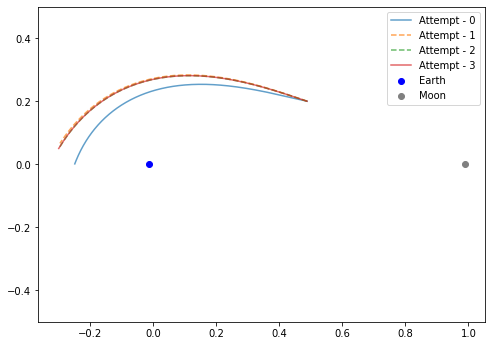

In [53]:
target = {'x_f': -0.3, 'y_f':0.05}
changeable = ('y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_1t, final_1t, tf_1t = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, tol=10**-6, 
                                   change_tf=True, changeable=changeable, plot=True, attempts=5, axs=axs)


delV_vec = IC_1t[3:6] - traj.y[3:6, 0]
delV_vec_dim = delV_vec*SS3.loc[system, 'l*']/SS3.loc[system, 't*']

final_dim = pn.L_2_dim(final_1t[:3], SS3.loc[system, 'l*'])

print('*'*5, ' Non-Dimensional ', '*'*5)
print('The delta V required is: ', np.round(delV_vec,5))
print('The delta V required is: ', round(np.linalg.norm(delV_vec),5))
print('Final position is: ', np.round(final_1t[:3],5))


print('\n','*'*5, ' Dimensional ', '*'*5)
print('The delta V required is (km/s): ', np.round(delV_vec_dim,5))
print('The delta V required is (km/s): ', round(np.linalg.norm(delV_vec_dim),5))
print('Final position is (km):', np.round(final_dim))
print('The time taken: ', timedelta(seconds = pn.t_2_dim(tf_1t, SS3.loc[system, 't*'])))


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')

*****  Non-Dimensional  *****
The delta V required is:  [ 0.      -0.35381  0.     ]
The delta V required is:  0.35381
Final position is:  [-0.1  0.   0. ]

 *****  Dimensional  *****
The delta V required is (km/s):  [ 0.     -0.3625  0.    ]
The delta V required is (km/s):  0.3625
Final position is (km): [-38440.      0.      0.]
The time taken:  1 day, 10:59:11.556458


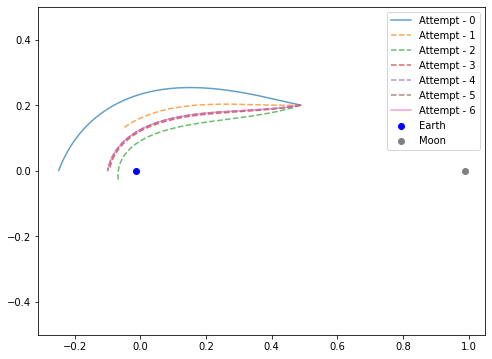

In [54]:
target = {'x_f': -0.1, 'y_f':0}
changeable = ('y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_2t, final_2t, tf_2t = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, tol=10**-6, 
                                   change_tf=True, changeable=changeable, plot=True, attempts=10, axs=axs)


delV_vec = IC_2t[3:6] - traj.y[3:6, 0]
delV_vec_dim = delV_vec*SS3.loc[system, 'l*']/SS3.loc[system, 't*']

final_dim = pn.L_2_dim(final_2t[:3], SS3.loc[system, 'l*'])

print('*'*5, ' Non-Dimensional ', '*'*5)
print('The delta V required is: ', np.round(delV_vec,5))
print('The delta V required is: ', round(np.linalg.norm(delV_vec),5))
print('Final position is: ', np.round(final_2t[:3],5))


print('\n','*'*5, ' Dimensional ', '*'*5)
print('The delta V required is (km/s): ', np.round(delV_vec_dim,5))
print('The delta V required is (km/s): ', round(np.linalg.norm(delV_vec_dim),5))
print('Final position is (km):', np.round(final_dim))
print('The time taken: ', timedelta(seconds = pn.t_2_dim(tf_2t, SS3.loc[system, 't*'])))


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')

*****  Non-Dimensional  *****
The delta V required is:  [0.      0.12823 0.     ]
The delta V required is:  0.12823
Final position is:  [-0.3   0.05  0.  ]

 *****  Dimensional  *****
The delta V required is (km/s):  [0.      0.13138 0.     ]
The delta V required is (km/s):  0.13138
Final position is (km): [-153760.  -38440.       0.]
The time taken:  2 days, 6:54:05.530867


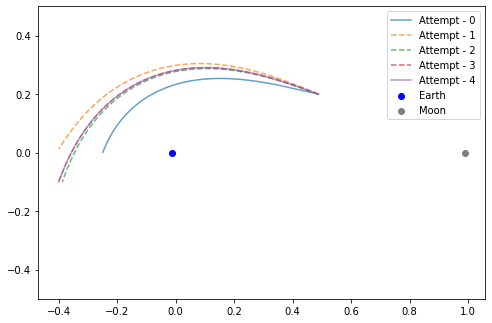

In [55]:
target = {'x_f': -0.4, 'y_f':-0.1}
changeable = ('y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_3t, final_3t, tf_3t = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, tol=10**-6, 
                                   change_tf=True, changeable=changeable, plot=True, attempts=5, axs=axs)


delV_vec = IC_3t[3:6] - traj.y[3:6, 0]
delV_vec_dim = delV_vec*SS3.loc[system, 'l*']/SS3.loc[system, 't*']

final_dim = pn.L_2_dim(final_3t[:3], SS3.loc[system, 'l*'])

print('*'*5, ' Non-Dimensional ', '*'*5)
print('The delta V required is: ', np.round(delV_vec,5))
print('The delta V required is: ', round(np.linalg.norm(delV_vec),5))
print('Final position is: ', np.round(final_1t[:3],5))

print('\n','*'*5, ' Dimensional ', '*'*5)
print('The delta V required is (km/s): ', np.round(delV_vec_dim,5))
print('The delta V required is (km/s): ', round(np.linalg.norm(delV_vec_dim),5))
print('Final position is (km):', np.round(final_dim))
print('The time taken: ', timedelta(seconds = pn.t_2_dim(tf_1t, SS3.loc[system, 't*'])))

axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')

### Part c)

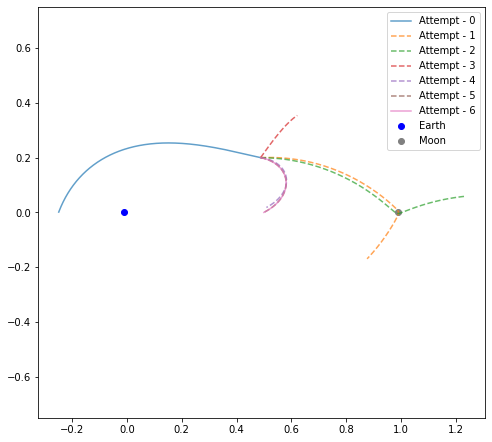

In [56]:
target = {'x_f': 0.5, 'y_f':0}
changeable = ('x_dot_0', 'y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_4, final_4, tf_4 = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, 
                                plot=True, attempts=10, axs=axs)


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.75,.75])
axs.set_aspect('equal', 'box')

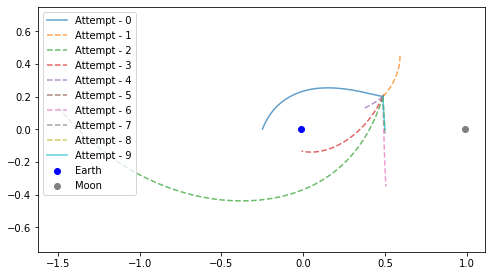

In [57]:
target = {'x_f': 0.5, 'y_f':0}
changeable = ('y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_4t, final_4t, tf_4t = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, tol=10**-6, 
                                   change_tf=True, changeable=changeable, plot=True, attempts=10, axs=axs)


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.75,.75])
axs.set_aspect('equal', 'box')

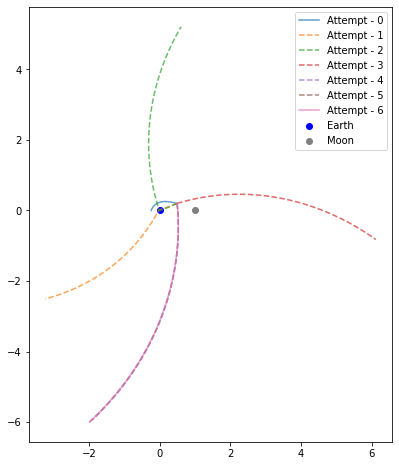

In [58]:
target = {'x_f': -2, 'y_f': -6}
changeable = ('x_dot_0', 'y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_5, final_5, tf_5 = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, 
                                plot=True, attempts=10, axs=axs)


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_aspect('equal', 'box')

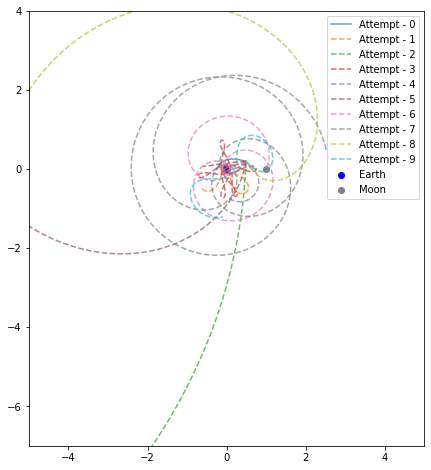

In [59]:
target = {'x_f': -2, 'y_f': -6}
changeable = ('y_dot_0')

fig, axs = plt.subplots(figsize= (8,8))
IC_5t, final_5t, tf_5t = pn.target(IC[:6], SS3.loc[system, 'miu'], [0, .477], target, tol=10**-6, 
                                   change_tf=True, changeable=changeable, plot=True, attempts=10, axs=axs)


axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-7, 4])
axs.set_xlim([-5, 5])
axs.set_aspect('equal', 'box')